# Import Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving PM_dataset_L.csv to PM_dataset_L (2).csv


Dataset Description
1. air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
2. process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
3. rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
4. torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
5. tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
6. 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

In [3]:
df = pd.read_csv('PM_dataset_L.csv', delimiter=';')
print(df)

         AT     PT   RPM     T   TW  MF
0     298.9  309.1  2861   4.6  143   1
1     298.9  309.0  1410  65.7  191   1
2     298.8  308.9  1455  41.3  208   1
3     298.4  308.2  1282  60.7  216   1
4     298.3  308.1  1412  52.3  218   1
...     ...    ...   ...   ...  ...  ..
5995  298.9  308.6  1771  24.1  213   0
5996  298.8  308.5  1527  36.2    3   0
5997  298.8  308.4  1484  39.2    8   0
5998  298.8  308.4  1401  47.3   10   0
5999  298.8  308.3  1634  27.9   12   0

[6000 rows x 6 columns]


In [4]:
# Separate Target Variable and Predictor Variables
# Predictors=['AT', 'PT', 'RPM', 'T', 'TW']
# TargetVariable=['MF']

X=df.drop('MF',axis=1)
y=df['MF']

In [5]:
X

,AT,PT,RPM,T,TW
0,298.9,309.1,2861,4.6,143
1,298.9,309.0,1410,65.7,191
2,298.8,308.9,1455,41.3,208
3,298.4,308.2,1282,60.7,216
4,298.3,308.1,1412,52.3,218
...,...,...,...,...,...
5995,298.9,308.6,1771,24.1,213
5996,298.8,308.5,1527,36.2,3
5997,298.8,308.4,1484,39.2,8
5998,298.8,308.4,1401,47.3,10


In [6]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: MF, Length: 6000, dtype: int64

# Undersampling Method to Handle Unbalance Dataset

In [7]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np
import warnings

In [8]:
# summarize class distribution
print("Before undersampling: ", Counter(y))

Before undersampling:  Counter({0: 5765, 1: 235})


In [9]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [10]:
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

In [11]:
# summarize class distribution
print("After undersampling: ", Counter(y_under))

After undersampling:  Counter({0: 235, 1: 235})


In [12]:
X_under

,AT,PT,RPM,T,TW
0,298.7,309.9,1371,51.3,201
1,302.1,311.3,1634,30.6,50
2,297.2,308.5,2182,16.5,127
3,302.2,311.0,1463,46.8,150
4,303.6,312.4,1388,41.9,221
...,...,...,...,...,...
465,298.6,309.8,2271,16.2,218
466,298.5,309.5,1294,66.7,12
467,298.5,309.4,1360,60.9,187
468,298.3,309.3,1337,56.1,206


In [13]:
y_under

0      0
1      0
2      0
3      0
4      0
      ..
465    1
466    1
467    1
468    1
469    1
Name: MF, Length: 470, dtype: int64

# Preprocessing New Dataset after Undersampling

## Train Test Split

In [14]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=42)

In [15]:
X_train

,AT,PT,RPM,T,TW
192,301.0,310.9,1740,28.9,129
249,297.9,309.8,1336,71.6,31
26,301.4,310.1,1937,21.8,205
7,300.8,310.9,1453,43.9,84
428,300.5,311.8,1524,38.9,214
...,...,...,...,...,...
106,302.0,310.9,1539,34.2,13
270,298.3,308.0,2886,3.8,57
348,302.3,310.1,1321,52.7,134
435,300.4,311.6,1200,76.6,3


In [16]:
y_train

192    0
249    1
26     0
7      0
428    1
      ..
106    0
270    1
348    1
435    1
102    0
Name: MF, Length: 329, dtype: int64

## Normalization Dataset

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Transform TRAIN dataset into between 0 and 1 number
sc = MinMaxScaler(feature_range=(0,1))
sc.fit(X_train)
X_train_sc = sc.transform(X_train)

In [18]:
X_train_sc

array([[0.61363636, 0.63157895, 0.3202847 , 0.34478022, 0.55364807],
       [0.26136364, 0.48684211, 0.08066429, 0.93131868, 0.13304721],
       [0.65909091, 0.52631579, 0.4371293 , 0.24725275, 0.87982833],
       ...,
       [0.76136364, 0.52631579, 0.0717675 , 0.6717033 , 0.5751073 ],
       [0.54545455, 0.72368421, 0.        , 1.        , 0.01287554],
       [0.34090909, 0.5       , 0.09252669, 0.76510989, 0.14592275]])

In [19]:
# Transform TESTING dataset into between 0 and 1 number
X_test_sc = sc.transform(X_test)

# Modelling : Multi Layer Perceptron Neural Network

In [20]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train_sc, y_train)

In [21]:
pred_train_mlp = clf.predict(X_train_sc)
pred_test_mlp = clf.predict(X_test_sc)

# Performance Evaluation Model

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
confusion_matrix(y_train, pred_train_mlp)

array([[144,  16],
       [ 21, 148]])

In [24]:
print(classification_report(y_train, pred_train_mlp))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       160
           1       0.90      0.88      0.89       169

    accuracy                           0.89       329
   macro avg       0.89      0.89      0.89       329
weighted avg       0.89      0.89      0.89       329



In [25]:
confusion_matrix(y_test, pred_test_mlp)

array([[66,  9],
       [ 9, 57]])

In [26]:
print(classification_report(y_test, pred_test_mlp))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        75
           1       0.86      0.86      0.86        66

    accuracy                           0.87       141
   macro avg       0.87      0.87      0.87       141
weighted avg       0.87      0.87      0.87       141



# ROC Curve and AUC

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy", metrics.accuracy_score(y_test, pred_test_mlp))

Accuracy 0.8723404255319149


In [28]:
fpr, tpr, _ = metrics.roc_curve(y_test, pred_test_mlp)
metrics.auc(fpr, tpr)

0.8718181818181818

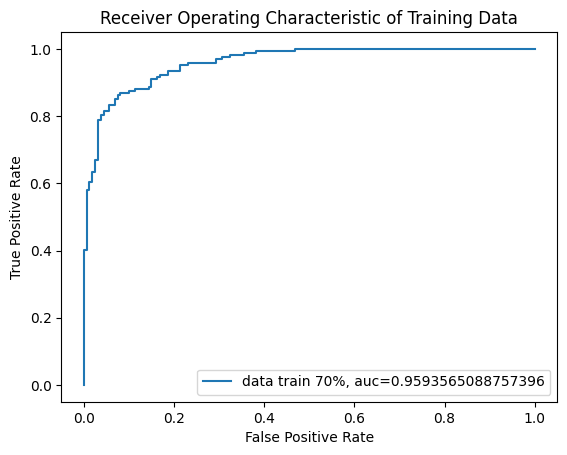

In [29]:
# Ref: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# https://www.statology.org/plot-roc-curve-python/
# define metrics
pred_train_mlp = clf.predict_proba(X_train_sc)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  pred_train_mlp)
auc = metrics.roc_auc_score(y_train, pred_train_mlp)

# create ROC curve
plt.title('Receiver Operating Characteristic of Training Data')
plt.plot(fpr,tpr,label="data train 70%, auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

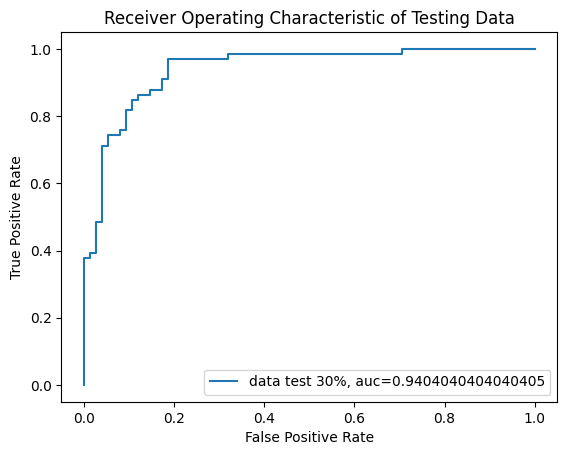

In [30]:
# Ref: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# https://www.statology.org/plot-roc-curve-python/
# define metrics
pred_test_mlp = clf.predict_proba(X_test_sc)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_test_mlp)
auc = metrics.roc_auc_score(y_test, pred_test_mlp)

#create ROC curve
plt.title('Receiver Operating Characteristic of Testing Data')
plt.plot(fpr,tpr,label="data test 30%, auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Dataset used in this experiment can be downloaded on the following link:
https://drive.google.com/file/d/1JHrWmmu_JbZwH7oR0av679tN8YtgZOjA/view?usp=sharing